<a href="https://colab.research.google.com/github/King-Deputy/Deputy_Python/blob/master/SAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Relevant Packages**

In [263]:
# load packages/libraries
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [264]:
# Define the ticker list
tickers_list = ['SGE.L','IPEL.L'] 
# set start and end date:
start_date = dt.datetime(2020,3,2)
end_date = dt.datetime(2022,2,28)

# Create placeholder for data
data = pd.DataFrame() 

# Fetch the data
for ticker in tickers_list:
    df = pdr.get_data_yahoo(ticker, start_date, end_date)
    df['ticker'] = ticker
    data = data.append(df)

print(data)

[*********************100%***********************]  1 of 1 completed


<ipython-input-264-3540c7c01c62>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-03-02  686.799988  705.799988  672.400024  694.200012  642.506653   
2020-03-03  702.400024  718.000000  700.400024  701.799988  649.540710   
2020-03-04  700.200012  710.599976  696.000000  704.000000  651.576904   
2020-03-05  705.599976  707.000000  677.200012  690.799988  639.359802   
2020-03-06  680.599976  683.599976  660.799988  668.000000  618.257629   
...                ...         ...         ...         ...         ...   
2022-02-21  505.000000  506.200012  505.000000  505.000000  379.944244   
2022-02-22  505.000000  510.000000  496.000000  505.000000  379.944244   
2022-02-23  505.000000  501.100006  500.000000  505.000000  379.944244   
2022-02-24  505.000000  504.989990  492.000000  493.000000  370.915894   
2022-02-25  492.000000  482.000000  470.279

<ipython-input-264-3540c7c01c62>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)


In [265]:
data = data.pivot(columns='ticker', values='Adj Close')
data.head()


ticker,IPEL.L,SGE.L
Date,,
2020-03-02,237.747299,642.506653
2020-03-03,237.747299,649.540710
2020-03-04,234.737839,651.576904
2020-03-05,237.747299,639.359802
2020-03-06,238.499664,618.257629


In [266]:
data['date']= data.index
data.rename(columns={'IPEL.L':'IPELL','SGE.L':'SGEL'},inplace=True)
data

ticker,IPELL,SGEL,date
Date,,,
2020-03-02,237.747299,642.506653,2020-03-02
2020-03-03,237.747299,649.540710,2020-03-03
2020-03-04,234.737839,651.576904,2020-03-04
2020-03-05,237.747299,639.359802,2020-03-05
2020-03-06,238.499664,618.257629,2020-03-06
...,...,...,...
2022-02-21,379.944244,662.378479,2022-02-21
2022-02-22,379.944244,667.059570,2022-02-22
2022-02-23,379.944244,660.818054,2022-02-23


In [267]:
#Generating summary statistics of stock return
# Calculate daily returns
data[['IPELL_return', 'SGEL_return']] = data[['IPELL', 'SGEL']].pct_change()
data

ticker,IPELL,SGEL,date,IPELL_return,SGEL_return
Date,,,,,
2020-03-02,237.747299,642.506653,2020-03-02,NaN,NaN
2020-03-03,237.747299,649.540710,2020-03-03,0.000000,0.010948
2020-03-04,234.737839,651.576904,2020-03-04,-0.012658,0.003135
2020-03-05,237.747299,639.359802,2020-03-05,0.012821,-0.018750
2020-03-06,238.499664,618.257629,2020-03-06,0.003165,-0.033005
...,...,...,...,...,...
2022-02-21,379.944244,662.378479,2022-02-21,0.000000,0.015854
2022-02-22,379.944244,667.059570,2022-02-22,0.000000,0.007067
2022-02-23,379.944244,660.818054,2022-02-23,0.000000,-0.009357


In [268]:
#training and testing set
train_data = data[:-20]
test_data = data[-20:]
train_data
test_data

ticker,IPELL,SGEL,date,IPELL_return,SGEL_return
Date,,,,,
2022-01-31,378.063354,702.948181,2022-01-31,-0.004950,0.013498
2022-02-01,378.063354,700.802673,2022-02-01,0.000000,-0.003052
2022-02-02,378.063354,713.480713,2022-02-02,0.000000,0.018091
2022-02-03,378.063354,692.415710,2022-02-03,0.000000,-0.029524
2022-02-04,378.063354,693.585999,2022-02-04,0.000000,0.001690
2022-02-07,378.063354,692.025574,2022-02-07,0.000000,-0.002250
2022-02-08,378.063354,679.347534,2022-02-08,0.000000,-0.018320
2022-02-09,378.063354,681.688110,2022-02-09,0.000000,0.003445
2022-02-10,378.063354,673.496094,2022-02-10,0.000000,-0.012017


In [269]:
data[['SGEL', 'IPELL', 'SGEL_return','IPELL_return']].describe()

ticker,SGEL,IPELL,SGEL_return,IPELL_return
count,504.000000,504.000000,503.000000,503.000000
mean,644.159255,237.315138,0.000256,0.000918
std,69.577424,69.231316,0.018263,0.014182
min,494.976257,165.520279,-0.133863,-0.067729
25%,581.483002,185.081772,-0.007399,0.000000
50%,646.554169,214.423996,0.000807,0.000000
75%,689.707153,258.813538,0.008900,0.000000
max,820.841858,391.229736,0.097394,0.094183


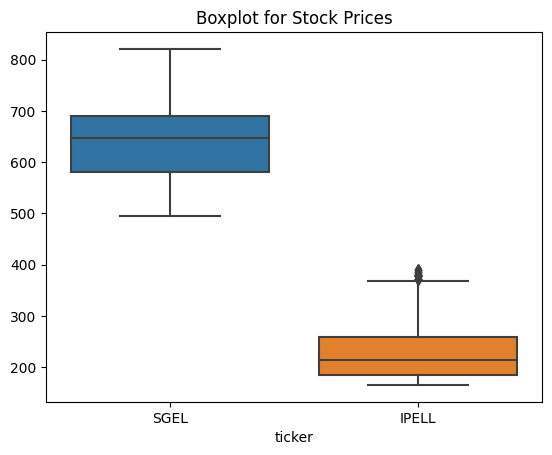

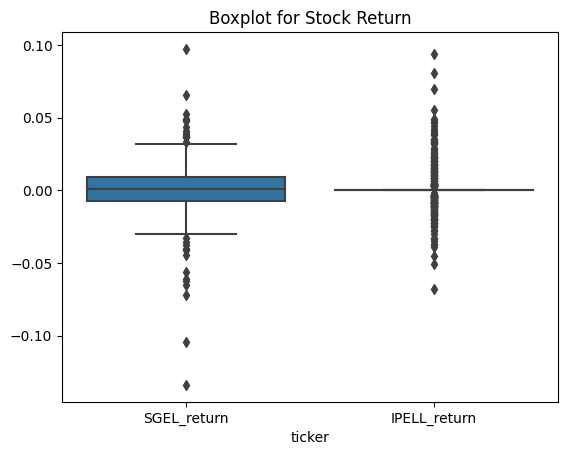

In [270]:
# plot boxplot for multiple variables
sns.boxplot(data=data[['SGEL', 'IPELL']])
plt.title('Boxplot for Stock Prices')
plt.show()
sns.boxplot(data=data[['SGEL_return','IPELL_return']])
plt.title('Boxplot for Stock Return')
plt.show()

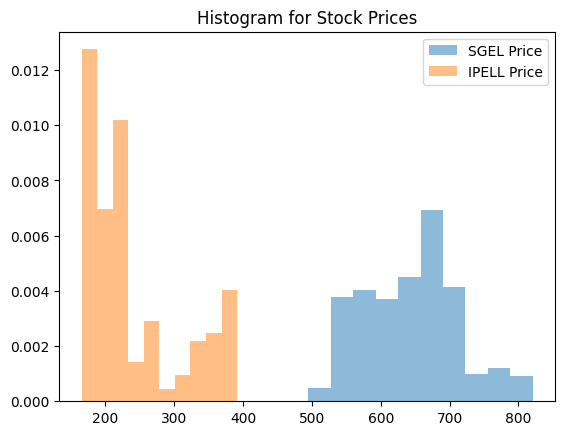

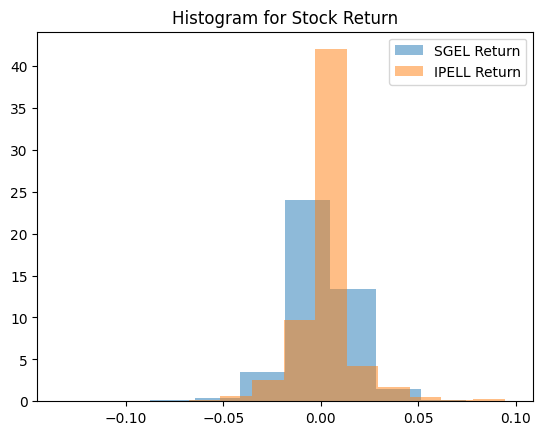

In [271]:
# plot histogram for multiple variables
plt.hist(data['SGEL'], alpha=0.5, label='SGEL Price', density=True)
plt.hist(data['IPELL'], alpha=0.5, label='IPELL Price', density=True)
plt.title('Histogram for Stock Prices')
plt.legend()
plt.show()

plt.hist(data['SGEL_return'], alpha=0.5, label='SGEL Return', density=True)
plt.hist(data['IPELL_return'], alpha=0.5, label='IPELL Return', density=True)
plt.title('Histogram for Stock Return')
plt.legend()
plt.show()

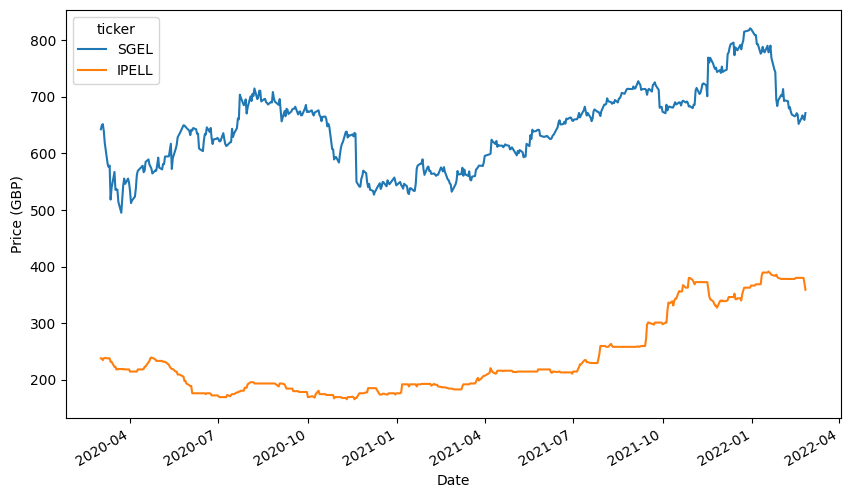

In [272]:
# Ploting the merged dataset
data[['SGEL', 'IPELL']].plot(figsize=(10, 6))
plt.ylabel('Price (GBP)')
plt.show()

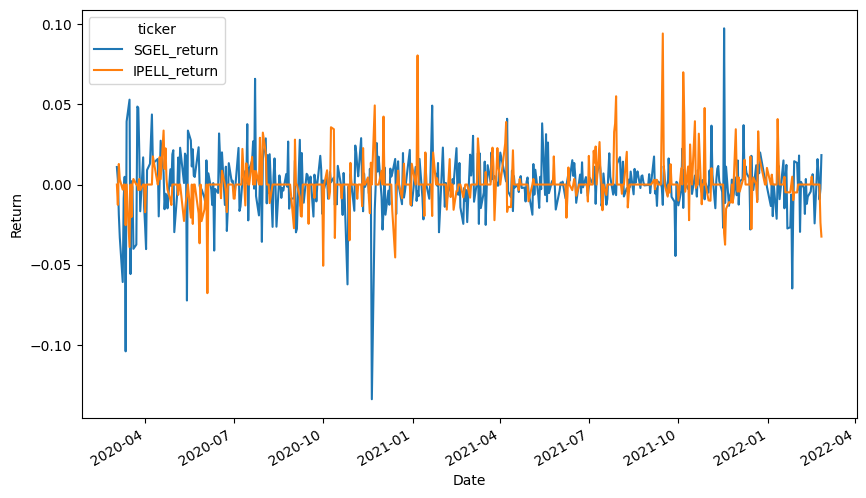

In [273]:
# Ploting the return dataset
data[['SGEL_return', 'IPELL_return']].plot(figsize=(10, 6))
plt.ylabel('Return')
plt.show()

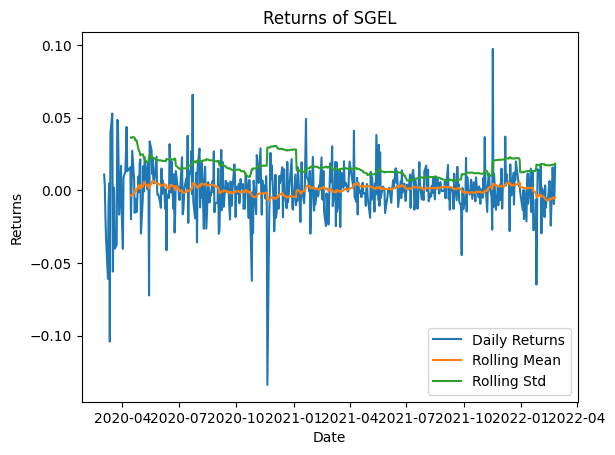

In [274]:
# Calculate rolling mean and standard deviation of returns
rolling_mean = data['SGEL_return'].rolling(window=30).mean()
rolling_std = data['SGEL_return'].rolling(window=30).std()

# Plot rolling mean and standard deviation of returns
plt.plot(data['date'], data['SGEL_return'], label='Daily Returns')
plt.plot(data['date'], rolling_mean, label='Rolling Mean')
plt.plot(data['date'], rolling_std, label='Rolling Std')
plt.legend()
plt.title('Returns of SGEL')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

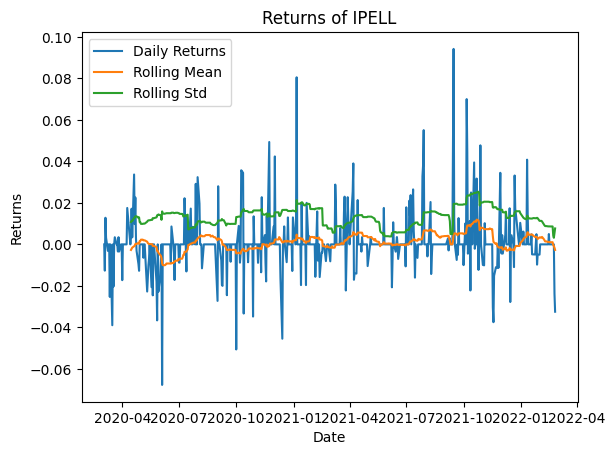

In [275]:
# Calculate rolling mean and standard deviation of returns
rolling_mean_2 = data['IPELL_return'].rolling(window=30).mean()
rolling_std_2 = data['IPELL_return'].rolling(window=30).std()

# Plot rolling mean and standard deviation of returns
plt.plot(data['date'], data['IPELL_return'], label='Daily Returns')
plt.plot(data['date'], rolling_mean_2, label='Rolling Mean')
plt.plot(data['date'], rolling_std_2, label='Rolling Std')
plt.legend()
plt.title('Returns of IPELL')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

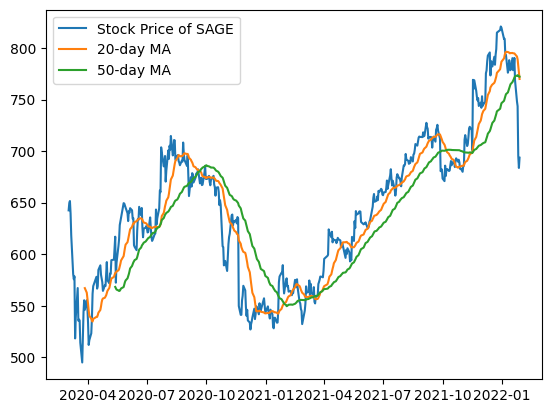

In [276]:
# Plot the moving averages and the stock prices
plt.plot(train_data.index, train_data['SGEL'], label='Stock Price of SAGE')
plt.plot(short_ma.index, short_ma, label='20-day MA')
plt.plot(long_ma.index, long_ma, label='50-day MA')
plt.legend()
plt.show()

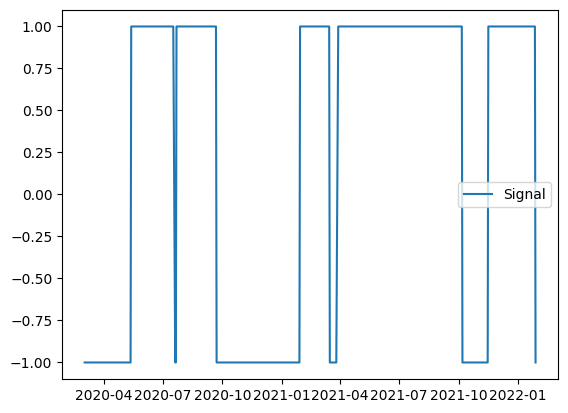

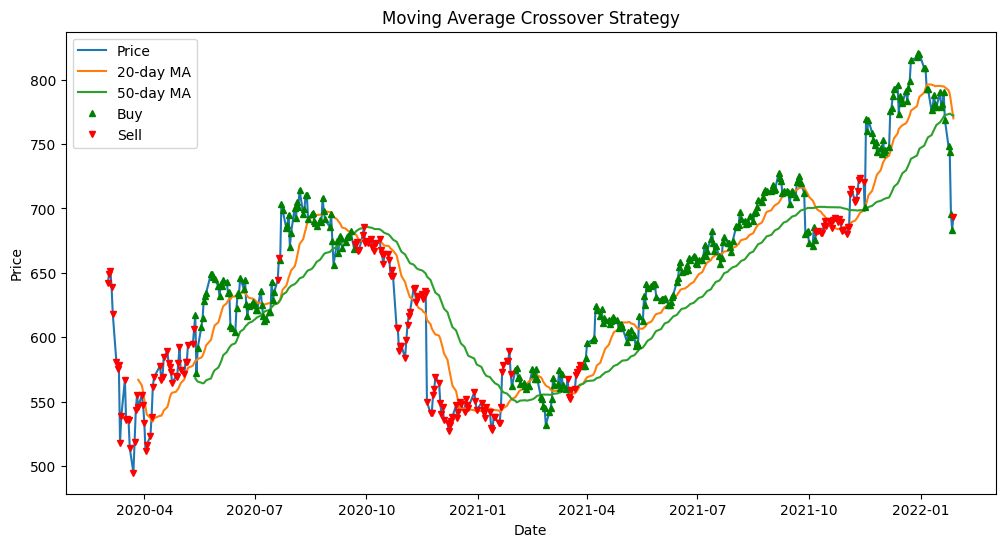

In [277]:
# Load the stock price data into a DataFrame and set the date column as the index
# Compute the short-term and long-term moving averages
short_ma = train_data['SGEL'].rolling(window=20).mean()
long_ma = train_data['SGEL'].rolling(window=50).mean()

# Define the trading strategy by creating a signal DataFrame
signal = pd.DataFrame(0, index=train_data.index, columns=['Signal'])
signal['Signal'] = np.where(short_ma > long_ma, 1, -1)
# Plot the signal
plt.plot(signal.index, signal, label='Signal')
plt.legend()
plt.show()

# Merge the signal DataFrame with the original DataFrame
train_data_signal = pd.concat([train_data, signal], axis=1)

# Visualize the price chart with the buy and sell signals
plt.figure(figsize=(12,6))
plt.plot(train_data_signal.index, train_data_signal['SGEL'], label='Price')
plt.plot(train_data_signal.index, short_ma, label='20-day MA')
plt.plot(train_data_signal.index, long_ma, label='50-day MA')
plt.plot(train_data_signal[train_data_signal['Signal'] == 1].index, train_data_signal['SGEL'][train_data_signal['Signal'] == 1], '^', markersize=5, color='g', label='Buy')
plt.plot(train_data_signal[train_data_signal['Signal'] == -1].index, train_data_signal['SGEL'][train_data_signal['Signal'] == -1], 'v', markersize=5, color='r', label='Sell')
plt.legend()
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Date
2020-03-02         NaN
2020-03-03   -0.010948
2020-03-04   -0.003135
2020-03-05    0.018750
2020-03-06    0.033005
                ...   
2022-01-24   -0.026643
2022-01-25   -0.006256
2022-01-26   -0.064795
2022-01-27   -0.016830
2022-01-28    0.014551
Length: 484, dtype: float64


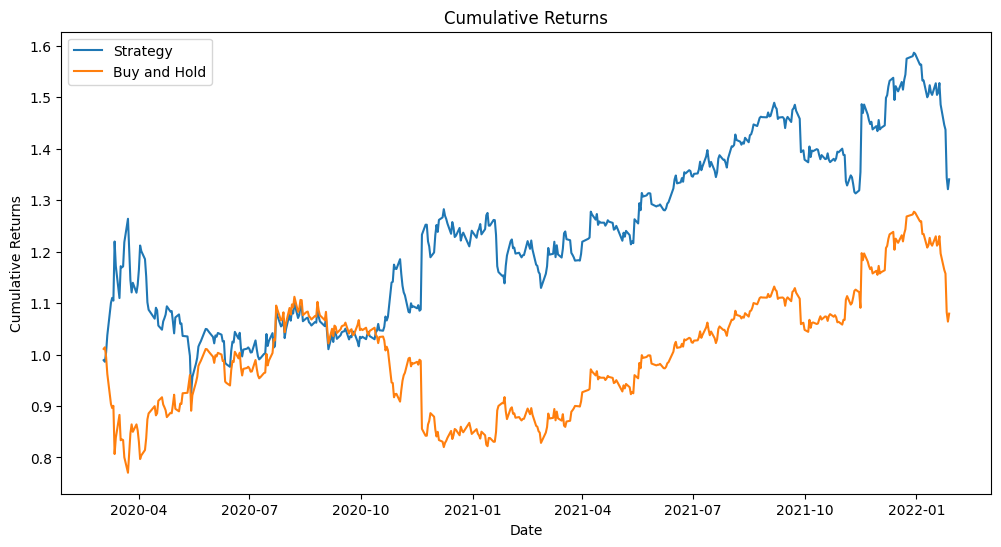

Sharpe Ratio: 0.666


In [278]:
# Compute the daily returns of the stock price
daily_returns = train_data['SGEL_return']

# Compute the daily returns of the strategy
strategy_returns = daily_returns * signal['Signal'].shift(1)
print(strategy_returns)
# Compute the cumulative returns of the strategy
cumulative_returns = (1 + strategy_returns).cumprod()

# Visualize the cumulative returns
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Strategy')
plt.plot(cumulative_returns.index, (1 + daily_returns).cumprod(), label='Buy and Hold')
plt.legend()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Calculate the Sharpe ratio of the strategy for the training set
train_sharpe_ratio = (strategy_returns.mean() /strategy_returns.std()) * np.sqrt(252)
print('Sharpe Ratio:',round(train_sharpe_ratio,3))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


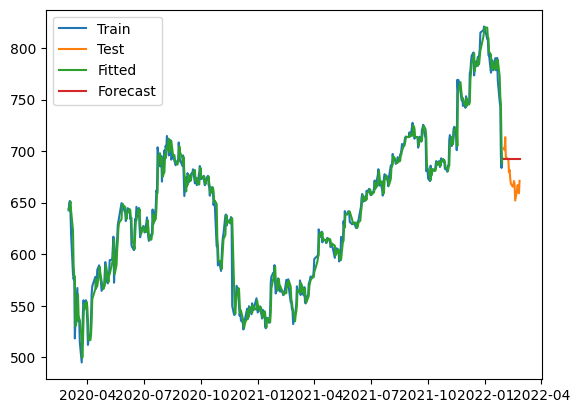

mse: 502.36
mae: 19.46


In [279]:
#Simple Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
alpha=0.80
single_model = SimpleExpSmoothing(train_data['SGEL']).fit(smoothing_level=alpha, optimized=True)
fitted_prices=single_model.fittedvalues
single_forecast = single_model.forecast(len(test_data['SGEL']))
# Plot the results
plt.plot(train_data.index,train_data['SGEL'],label='Train')
plt.plot(test_data.index, test_data['SGEL'], label='Test')
plt.plot(fitted_prices.index, fitted_prices, label='Fitted')
plt.plot(test_data.index, single_forecast, label='Forecast') 
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(test_data['SGEL'], single_forecast)
# Calculate MAE
mae = mean_absolute_error(test_data['SGEL'], single_forecast)
print('mse:',round(mse,2))
print('mae:',round(mae,2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


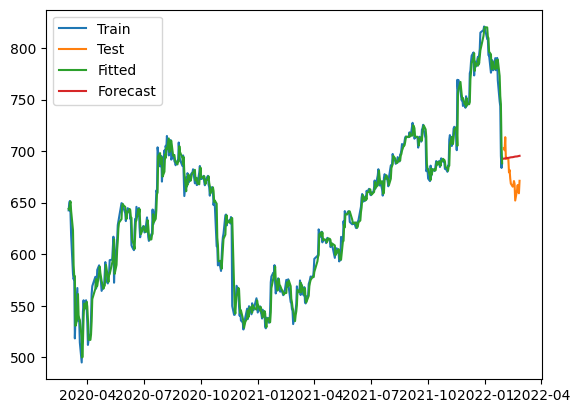

mse: 577.08
mae: 20.84


In [280]:
from statsmodels.tsa.api import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['SGEL'], trend="additive").fit(smoothing_level=alpha, optimized=True)
double_fitted_prices=  double_model.fittedvalues
double_forecast = double_model.forecast(len(test_data['SGEL']))
# Plot the results
plt.plot(train_data.index,train_data['SGEL'],label='Train')
plt.plot(test_data.index, test_data['SGEL'], label='Test')
plt.plot(double_fitted_prices.index, double_fitted_prices, label='Fitted')
plt.plot(test_data.index, double_forecast, label='Forecast') 
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(test_data['SGEL'], double_forecast)
# Calculate MAE
mae = mean_absolute_error(test_data['SGEL'], double_forecast)
print('mse:', round(mse,2))
print('mae:', round(mae,2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


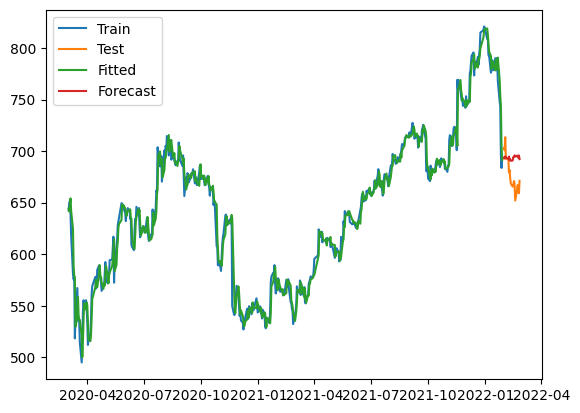

mse: 547.11
mae: 20.1


In [281]:
from statsmodels.tsa.api import ExponentialSmoothing
winter_model = ExponentialSmoothing(train_data['SGEL'], trend="additive", seasonal="multiplicative", seasonal_periods=12).fit(smoothing_level=alpha, optimized=True)
winter_fitted_prices=  winter_model.fittedvalues
winter_forecast = winter_model.forecast(len(test_data['SGEL']))
# Plot the results
plt.plot(train_data.index,train_data['SGEL'],label='Train')
plt.plot(test_data.index, test_data['SGEL'], label='Test')
plt.plot(winter_fitted_prices.index, winter_fitted_prices, label='Fitted')
plt.plot(test_data.index, winter_forecast, label='Forecast') 
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(test_data['SGEL'], winter_forecast)
# Calculate MAE
mae = mean_absolute_error(test_data['SGEL'], winter_forecast)
print('mse:', round(mse,2))
print('mae:', round(mae,2))

In [282]:
# calculate beta
import statsmodels.formula.api as smf
est_capm = smf.ols(formula='SGEL ~ IPELL', data=data).fit()
print(est_capm.summary())

                            OLS Regression Results                            
Dep. Variable:                   SGEL   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     378.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.78e-63
Time:                        18:06:17   Log-Likelihood:                -2711.1
No. Observations:                 504   AIC:                             5426.
Df Residuals:                     502   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    487.7506      8.371     58.270      0.0

In [283]:
# predict yhat
yhat1 = est_capm.fittedvalues
print(yhat1)

Date
2020-03-02    644.444083
2020-03-03    644.444083
2020-03-04    642.460620
2020-03-05    644.444083
2020-03-06    644.939948
                 ...    
2022-02-21    738.162635
2022-02-22    738.162635
2022-02-23    738.162635
2022-02-24    732.212269
2022-02-25    724.278399
Length: 504, dtype: float64


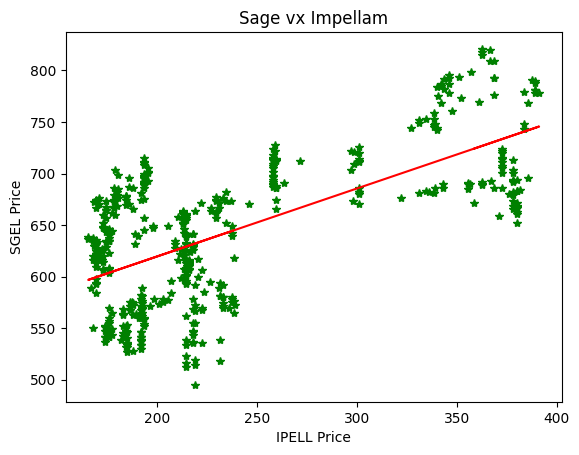

In [284]:
plt.figure()
plt.plot(data['IPELL'], data['SGEL'], 'g*')
plt.plot(data['IPELL'], yhat1, 'r')
plt.xlabel('IPELL Price')
plt.ylabel('SGEL Price')
plt.title('Sage vx Impellam')
plt.show()

In [285]:
factors = pdr.get_data_famafrench('F-F_Research_Data_Factors_Daily', start_date, end_date)[0]
factors = factors[1:]
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2020-03-03,-2.79,0.80,-0.63,0.006
2020-03-04,4.03,-1.08,-1.17,0.006
2020-03-05,-3.38,0.24,-1.40,0.006
2020-03-06,-1.78,0.06,-1.49,0.006
2020-03-09,-7.78,-0.38,-4.76,0.006
...,...,...,...,...
2022-02-22,-1.18,-0.48,0.11,0.000
2022-02-23,-1.96,-0.20,1.26,0.000
2022-02-24,1.89,1.51,-3.86,0.000


In [286]:
# merge data:
merge = pd.merge(data[['SGEL_return','IPELL_return']], factors, how = 'left', on = ['Date'], )
merge

,SGEL_return,IPELL_return,Mkt-RF,SMB,HML,RF
Date,,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.010948,0.000000,-2.79,0.80,-0.63,0.006
2020-03-04,0.003135,-0.012658,4.03,-1.08,-1.17,0.006
2020-03-05,-0.018750,0.012821,-3.38,0.24,-1.40,0.006
2020-03-06,-0.033005,0.003165,-1.78,0.06,-1.49,0.006
...,...,...,...,...,...,...
2022-02-21,0.015854,0.000000,NaN,NaN,NaN,NaN
2022-02-22,0.007067,0.000000,-1.18,-0.48,0.11,0.000
2022-02-23,-0.009357,0.000000,-1.96,-0.20,1.26,0.000


In [287]:
# divide value of 03 columns by 100 as they are expressed in percentage:
merge[['Mkt-RF','SMB', 'HML', 'RF']] = merge[['Mkt-RF','SMB', 'HML', 'RF']]/100

# rename column:
merge.rename(columns = {'Mkt-RF': 'Mkt_RF'}, inplace = True)

merge

,SGEL_return,IPELL_return,Mkt_RF,SMB,HML,RF
Date,,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.010948,0.000000,-0.0279,0.0080,-0.0063,0.00006
2020-03-04,0.003135,-0.012658,0.0403,-0.0108,-0.0117,0.00006
2020-03-05,-0.018750,0.012821,-0.0338,0.0024,-0.0140,0.00006
2020-03-06,-0.033005,0.003165,-0.0178,0.0006,-0.0149,0.00006
...,...,...,...,...,...,...
2022-02-21,0.015854,0.000000,NaN,NaN,NaN,NaN
2022-02-22,0.007067,0.000000,-0.0118,-0.0048,0.0011,0.00000
2022-02-23,-0.009357,0.000000,-0.0196,-0.0020,0.0126,0.00000


In [288]:
# generate sage excess return:
merge['excess_return'] = merge['SGEL_return'] - merge['RF']
merge2=merge.dropna()

In [289]:
import statsmodels.formula.api as smf
formula = 'excess_return ~ Mkt_RF'
est_capm1 = smf.ols(formula, merge).fit()
print(est_capm1.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     45.94
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           3.51e-11
Time:                        18:06:52   Log-Likelihood:                 1292.2
No. Observations:                 492   AIC:                            -2580.
Df Residuals:                     490   BIC:                            -2572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.001     -0.317      0.7

In [290]:
# predict yhat
yhat = est_capm1.fittedvalues
print(yhat)

Date
2020-03-03   -0.009186
2020-03-04    0.012656
2020-03-05   -0.011075
2020-03-06   -0.005951
2020-03-09   -0.025166
                ...   
2022-02-18   -0.003037
2022-02-22   -0.004030
2022-02-23   -0.006528
2022-02-24    0.005802
2022-02-25    0.006891
Length: 492, dtype: float64


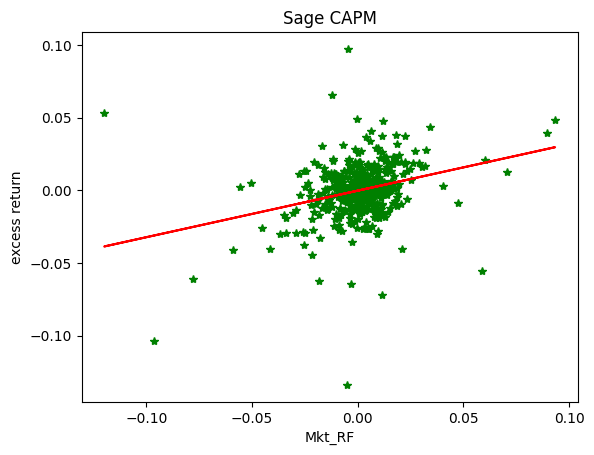

In [291]:
plt.figure()
plt.plot(merge2['Mkt_RF'], merge2['excess_return'], 'g*')
plt.plot(merge2['Mkt_RF'], yhat, 'r')
plt.xlabel('Mkt_RF')
plt.ylabel('excess return')
plt.title('Sage CAPM')
plt.show()